<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_9_clustering/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs, make_moons, make_circles

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SouthGermanCredit.asc', delim_whitespace=True)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-9d314fdc7b6f>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SouthGermanCredit.asc', delim_whitespace=True)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [6]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [7]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

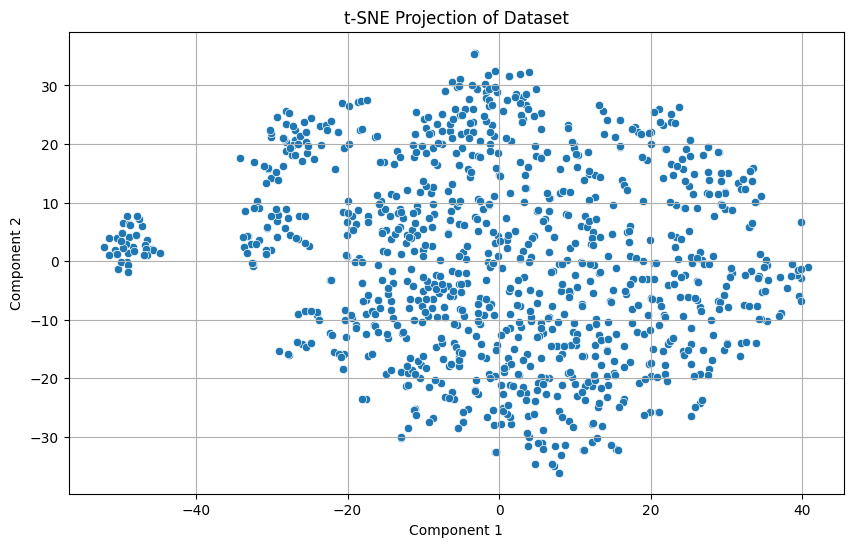

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1])
plt.title("t-SNE Projection of Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)

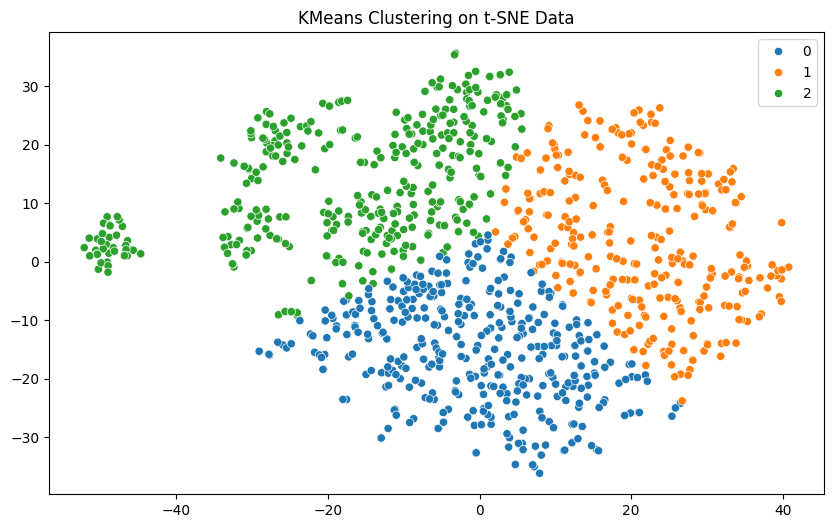

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=kmeans_labels, palette='tab10')
plt.title("KMeans Clustering on t-SNE Data")
plt.show()

In [11]:
dbscan = DBSCAN(eps=5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_tsne)

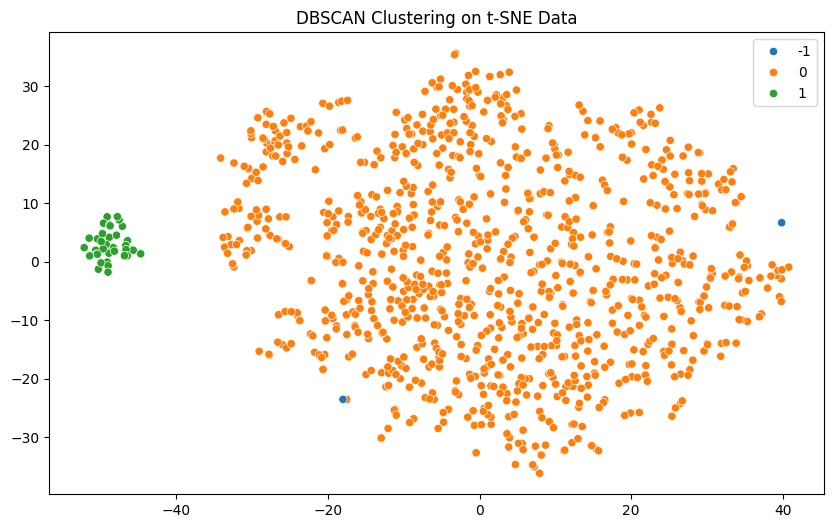

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=dbscan_labels, palette='tab10')
plt.title("DBSCAN Clustering on t-SNE Data")
plt.show()

In [15]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(X_tsne)

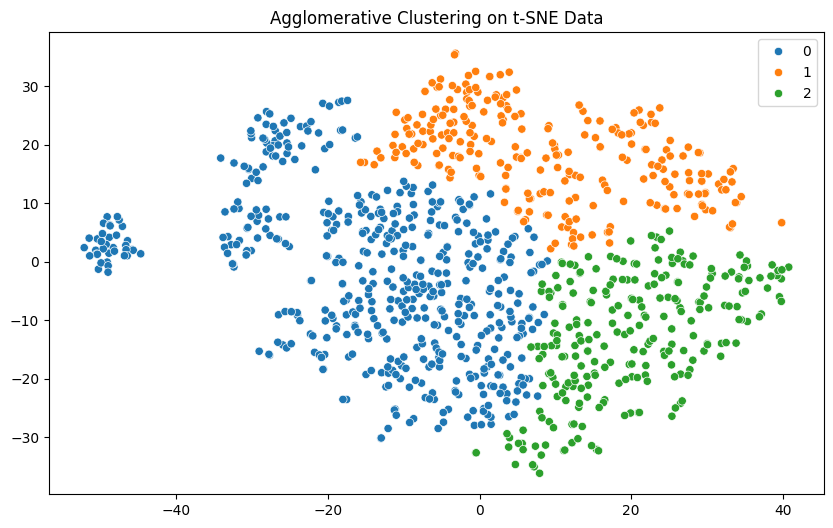

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=agglo_labels, palette='tab10')
plt.title("Agglomerative Clustering on t-SNE Data")
plt.show()

In [17]:
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X_tsne)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


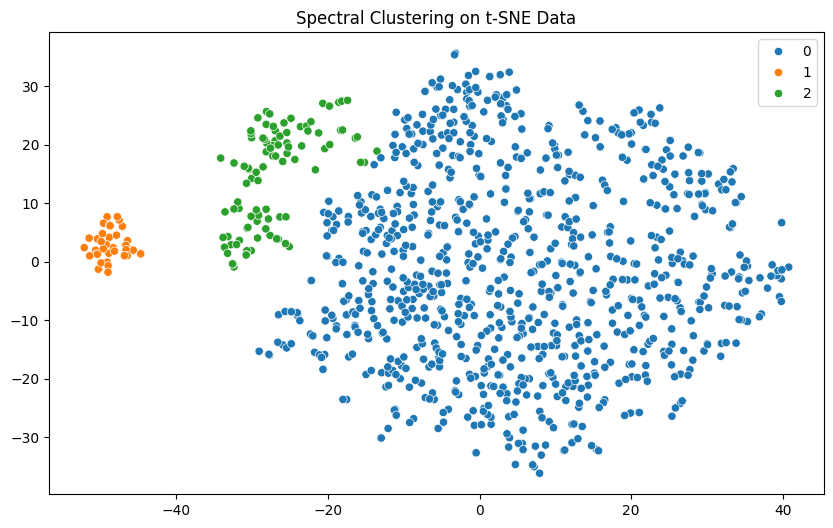

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=spectral_labels, palette='tab10')
plt.title("Spectral Clustering on t-SNE Data")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


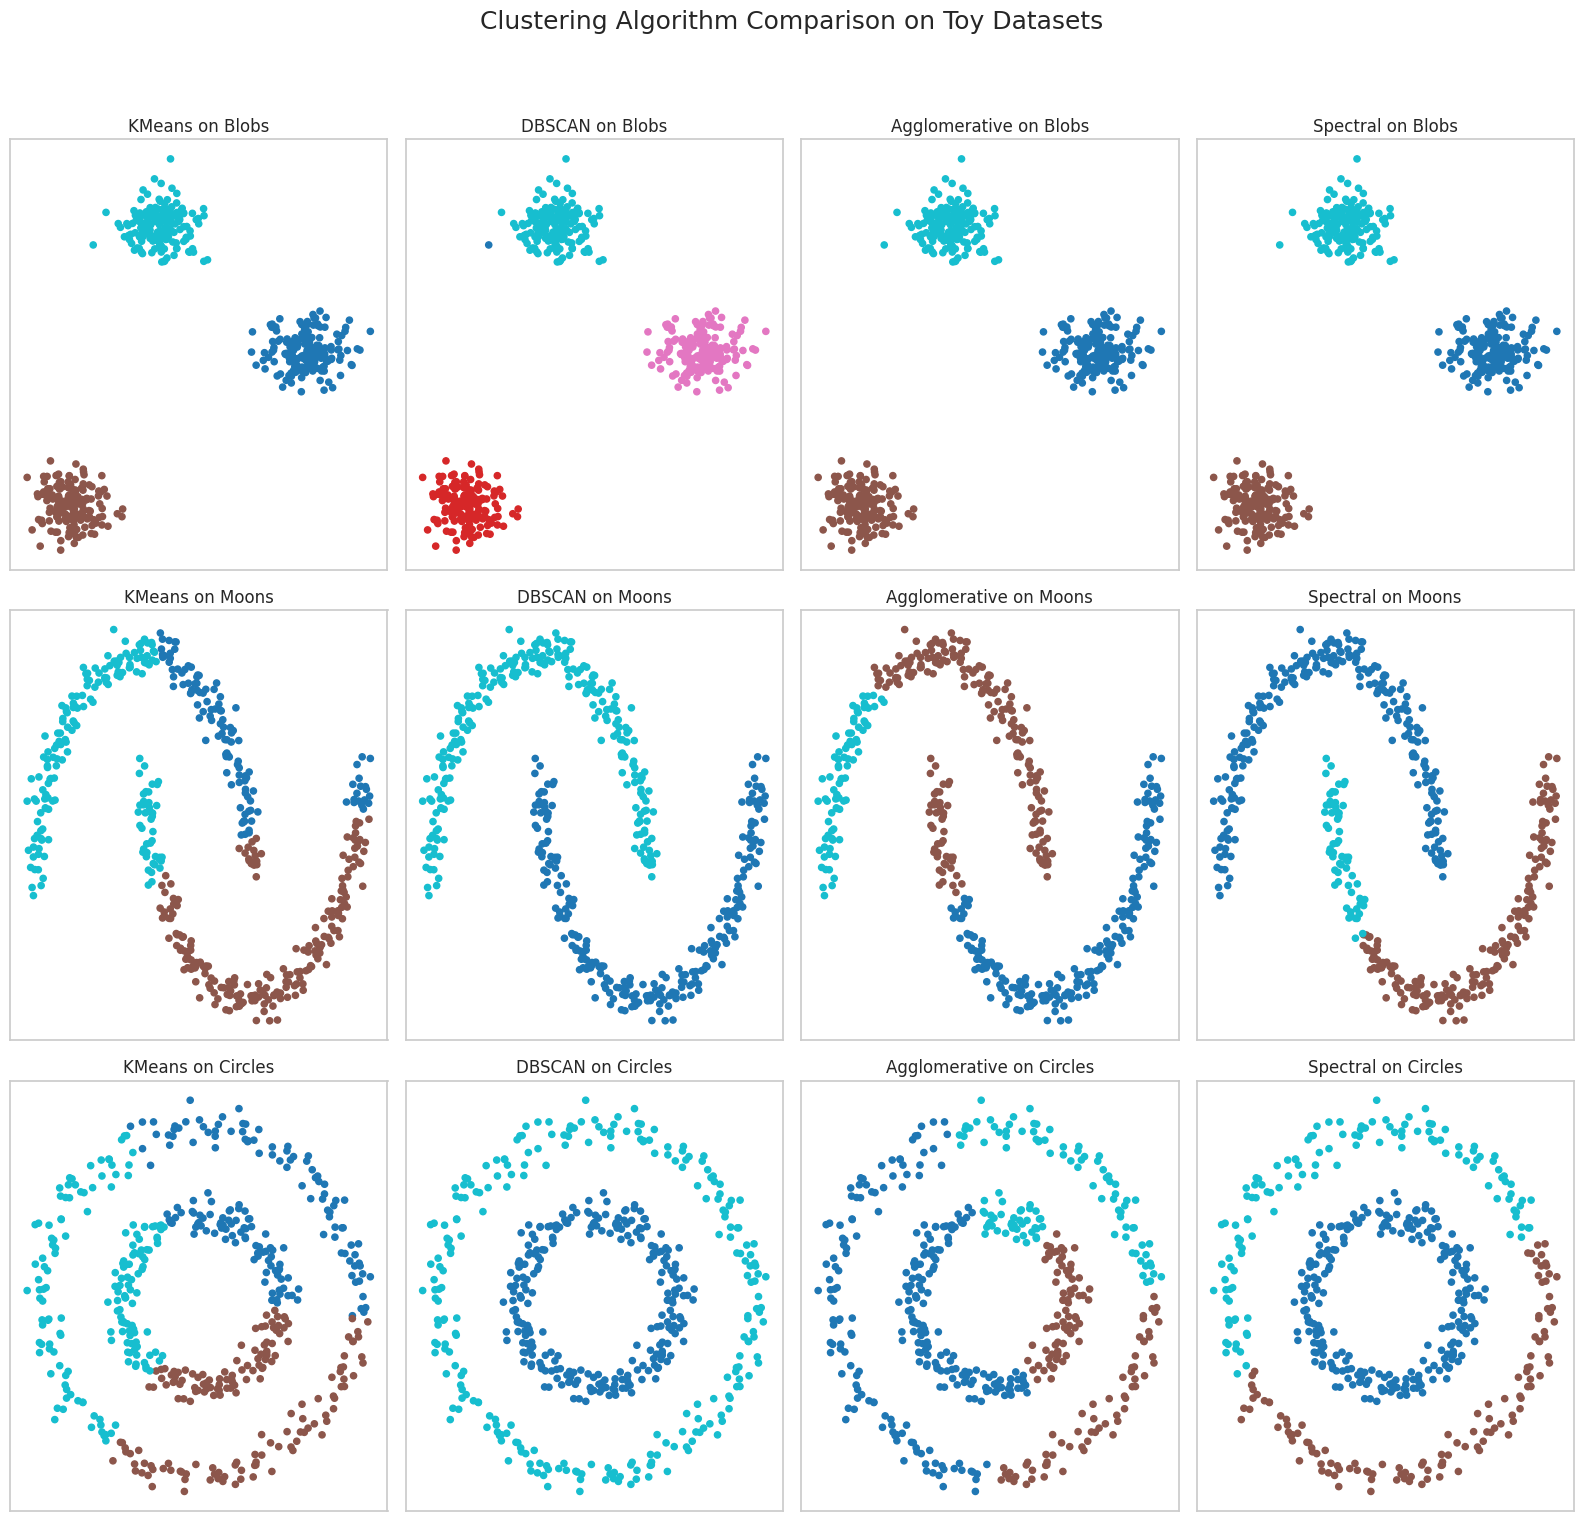

In [27]:
# Setup for plotting
sns.set(style="whitegrid")
fig, axs = plt.subplots(3, 4, figsize=(16, 16))
fig.suptitle("Clustering Algorithm Comparison on Toy Datasets", fontsize=18)

# Define datasets
datasets = {
    "Blobs": make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42),
    "Moons": make_moons(n_samples=500, noise=0.05, random_state=42),
    "Circles": make_circles(n_samples=500, noise=0.05, factor=0.5, random_state=42)
}

# Clustering models
models = {
    "KMeans": lambda: KMeans(n_clusters=3, random_state=42),
    "DBSCAN": lambda: DBSCAN(eps=0.3, min_samples=5),
    "Agglomerative": lambda: AgglomerativeClustering(n_clusters=3),
    "Spectral": lambda: SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
}

# Loop through datasets and models
for row_idx, (dataset_name, (X, y)) in enumerate(datasets.items()):
    X = StandardScaler().fit_transform(X)
    for col_idx, (model_name, model_func) in enumerate(models.items()):
        model = model_func()
        try:
            y_pred = model.fit_predict(X)
        except:
            y_pred = model.fit(X).labels_
        axs[row_idx, col_idx].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='tab10', s=20)
        axs[row_idx, col_idx].set_title(f"{model_name} on {dataset_name}")
        axs[row_idx, col_idx].set_xticks([])
        axs[row_idx, col_idx].set_yticks([])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Clustering Algorithm Comparison Summary

| Dataset  | KMeans  | DBSCAN  | Agglomerative | Spectral |
|----------|---------|---------|----------------|----------|
| **Blobs**    | ✅ Excellent | ✅ Excellent | ✅ Excellent     | ✅ Excellent |
| **Moons**    | ❌ Poor     | ✅ Great    | ✅ Good          | ✅ Excellent |
| **Circles**  | ❌ Poor     | ✅ Excellent | ❌ Poor          | ✅ Excellent |

KMeans is great for simple, well-separated clusters.

DBSCAN is powerful for arbitrary shapes and noise-resilient.

Agglomerative does decently but struggles with complex patterns.

Spectral Clustering shines on non-convex structures (moons/circles) — very versatile.